In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import sys
import pandas as pd
from scipy import sparse #cut down on memory size
from sklearn.metrics.pairwise import pairwise_distances 

In [3]:
#merging all datasets
#df = pd.concat(map(pd.read_csv, glob.glob('datasets/*.csv')))

In [4]:
df = pd.read_csv('./book_rating_dataset/ratings.csv')

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,user_id,rating,book_name,book_id
0,0,0,11375137,it was amazing,Harry Potter and the Half-Blood Prince,1
1,202,202,4886576,it was amazing,Harry Potter and the Half-Blood Prince,1
2,201,201,14066678,it was amazing,Harry Potter and the Half-Blood Prince,1
3,200,200,68204342,it was amazing,Harry Potter and the Half-Blood Prince,1
4,199,199,13614926,it was amazing,Harry Potter and the Half-Blood Prince,1


In [6]:
#dropped unnamed column
df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], axis = 0, inplace = True)

In [7]:
df.head()

,user_id,rating,book_name,book_id
0,11375137,it was amazing,Harry Potter and the Half-Blood Prince,1
1,4886576,it was amazing,Harry Potter and the Half-Blood Prince,1
2,14066678,it was amazing,Harry Potter and the Half-Blood Prince,1
3,68204342,it was amazing,Harry Potter and the Half-Blood Prince,1
4,13614926,it was amazing,Harry Potter and the Half-Blood Prince,1


In [8]:
# sorting the dataframe by book id
df = df.sort_values(by = 'book_id')

In [9]:
#checking for null values
df['book_id'].isnull().sum()

0

In [39]:
mask

,user_id,rating,book_name,book_id
133165,51819223,it was amazing,Millionaire Women Next Door: The Many Journeys...,1000
133164,1302420,it was amazing,Millionaire Women Next Door: The Many Journeys...,1000
133163,4620479,it was amazing,Millionaire Women Next Door: The Many Journeys...,1000
133162,2787011,liked it,Millionaire Women Next Door: The Many Journeys...,1000
133161,14176203,really liked it,Millionaire Women Next Door: The Many Journeys...,1000
...,...,...,...,...
133140,2078531,really liked it,Millionaire Women Next Door: The Many Journeys...,1000
133139,5288044,it was ok,Millionaire Women Next Door: The Many Journeys...,1000
133138,9752258,it was amazing,Millionaire Women Next Door: The Many Journeys...,1000
133137,1034704,it was ok,Millionaire Women Next Door: The Many Journeys...,1000


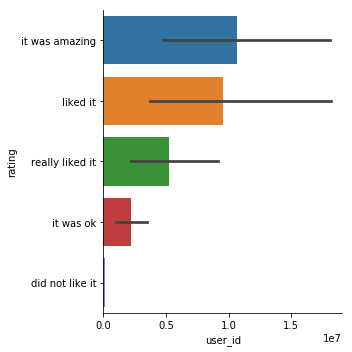

In [43]:
mask = df[df['book_id'] == 1000]

sns.catplot(x="user_id",y="rating",kind='bar',data=mask);

In [11]:
df.shape

(532029, 4)

In [12]:
df.describe()

,user_id,book_id
count,5.320290e+05,532029.000000
mean,2.087642e+07,2018.240382
std,2.457419e+07,1188.835286
min,1.000000e+00,1.000000
25%,2.561048e+06,999.000000
50%,8.831935e+06,2030.000000
75%,3.268771e+07,3013.000000
max,1.058990e+08,4069.000000


In [20]:
#checking the value counts for rating in order to map it on a scale of 1 - 5; 5 being the best
df['rating'].value_counts()

it was amazing     185740
really liked it    173860
liked it           108993
it was ok           40834
did not like it     22602
Name: rating, dtype: int64

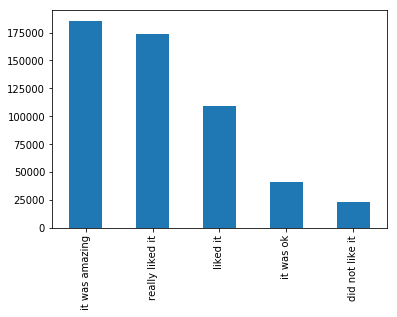

In [22]:
df['rating'].value_counts().plot(kind = 'bar');

In [153]:
#mapped rating from 1-5
df['rating']=df['rating'].map({'it was amazing': 5,
                               'really liked it':4, 
                               'liked it':3,
                               'it was ok':2, 
                               'did not like it': 1})

In [82]:
df['rating'].value_counts()

5    185740
4    173860
3    108993
2     40834
1     22602
Name: rating, dtype: int64

In [24]:
df.head()

,user_id,rating,book_name,book_id
0,11375137,it was amazing,Harry Potter and the Half-Blood Prince,1
201,22106879,it was amazing,Harry Potter and the Half-Blood Prince,1
200,4050629,it was amazing,Harry Potter and the Half-Blood Prince,1
199,156760,it was amazing,Harry Potter and the Half-Blood Prince,1
198,47207032,it was amazing,Harry Potter and the Half-Blood Prince,1


In [84]:
# Dropping duplicate rows so that we have unique values
df.drop_duplicates()

,user_id,rating,book_name,book_id
0,11375137,5,Harry Potter and the Half-Blood Prince,1
202,4886576,5,Harry Potter and the Half-Blood Prince,1
201,14066678,5,Harry Potter and the Half-Blood Prince,1
200,68204342,5,Harry Potter and the Half-Blood Prince,1
199,13614926,5,Harry Potter and the Half-Blood Prince,1
...,...,...,...,...
12922,1045774,5,Man's Search for Meaning,4069
12921,81152050,5,Man's Search for Meaning,4069
12920,9945293,5,Man's Search for Meaning,4069
12919,35705439,5,Man's Search for Meaning,4069


## Item-based collaborative recommender

#### Create a pivot table
 - Pivot table willl convert an array into matrix form
 - We need to specify our index, columns and values for the matrix
 - Index is the book name and the values for the index is the ratings. Columns are the users 
 - Checking the shape of the matrix 


In [85]:
pivot = df.pivot_table(index = 'book_name', columns = 'user_id', values = 'rating')# user id as the index- swap
pivot.head()

user_id,1,3,5,6,8,9,14,18,21,26,...,105738922,105740054,105757466,105757814,105782804,105807671,105823641,105863419,105885026,105899046
book_name,,,,,,,,,,,,,,,,,,,,,
"""A"" Is for Zebra",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Fabulae Novae"" Di Fedro",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""The Earth is Flat"" and Other Great Mistakes",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""The Pleasure Dome"": Amerikansk Experimentfilm 1939 1979: [Moderna Museet, Stockholm], 16 Februari 4 April 1980",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1,000 Places to See in the U.S.A. Canada Before You Die",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
pivot.shape

(3266, 227944)

#### Create sparse matrix
 - Created a sparse matrix since the size of the pivot dataset is too large
 - Sparse matrix performs gradient decent under the hood in order to decrease the size of the matrix
 - The shape is not affected, only the size of the matrix is reduced
---
 - Sparse matrix shows the index and the column name which has value(rating), since everything else is 0 except one rating per user
 - It also shows the rating value ( code shown below in the print statement )

In [155]:
# checking the shape
pivot.shape

(3266, 227944)

In [87]:
# checking the size of the pivot table
sys.getsizeof(pivot) #byte size

5956046591

In [88]:
# we want a metrix with a smaller file size for easier computation
pivot_sparse = sparse.csr_matrix(pivot.fillna(0))


In [89]:
# no changes in the shape
pivot_sparse.shape

(3266, 227944)

In [90]:
sys.getsizeof(pivot_sparse) # we decreased our byte size

56

In [91]:
print(pivot_sparse[:5, :])

  (0, 5943)	2.0
  (0, 6644)	4.0
  (0, 11990)	3.0
  (0, 14450)	3.0
  (0, 22327)	2.0
  (0, 22404)	4.0
  (0, 23381)	5.0
  (0, 23716)	4.0
  (0, 25418)	3.0
  (0, 32057)	4.0
  (0, 33363)	4.0
  (0, 38432)	3.0
  (0, 42791)	5.0
  (0, 44083)	4.0
  (0, 46064)	3.0
  (0, 47660)	4.0
  (0, 50295)	3.0
  (0, 51100)	3.0
  (0, 53496)	4.0
  (0, 56489)	5.0
  (0, 59252)	3.0
  (0, 61320)	4.0
  (0, 62104)	5.0
  (0, 69536)	3.0
  (0, 70336)	4.0
  :	:
  (4, 86443)	3.0
  (4, 86934)	4.0
  (4, 87623)	2.0
  (4, 88307)	4.0
  (4, 89100)	4.0
  (4, 90694)	5.0
  (4, 92369)	5.0
  (4, 94887)	5.0
  (4, 97822)	3.0
  (4, 99932)	5.0
  (4, 102903)	2.0
  (4, 106447)	3.0
  (4, 111722)	1.0
  (4, 111814)	5.0
  (4, 112159)	4.0
  (4, 114142)	3.0
  (4, 116219)	5.0
  (4, 116651)	3.0
  (4, 124802)	4.0
  (4, 131354)	3.0
  (4, 149014)	2.0
  (4, 155890)	3.0
  (4, 159933)	5.0
  (4, 168380)	5.0
  (4, 205799)	5.0


#### Calculate cosine similarities
 - Pairwise distances is an sklearn function which will calculate the row wise difference between books
 - It will return a square matrix with the comparisons

In [156]:
# cos sim: -1 and +1 where +1 is good
# pairwise: 0 and 1 where 0 is good
recommender = pairwise_distances(pivot_sparse, metric='cosine')
recommender

array([[0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.98841932, 1.        ,
        1.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 0.98841932, 1.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        0.99179174],
       [1.        , 1.        , 1.        , ..., 1.        , 0.99179174,
        0.        ]])

#### Create distances dataframe
 - We create a pandas dataframe from the array above since it is easier to visualize 
 - The values are the distances calculated between books

In [93]:
# previous pivot table has the name of the indices, we can put them togeather and create a pandas dataframe
recommender_df = pd.DataFrame(recommender, index = pivot.index, columns = pivot.index)

In [94]:
recommender_df

book_name,"""A"" Is for Zebra","""Fabulae Novae"" Di Fedro","""The Earth is Flat"" and Other Great Mistakes","""The Pleasure Dome"": Amerikansk Experimentfilm 1939 1979: [Moderna Museet, Stockholm], 16 Februari 4 April 1980","1,000 Places to See in the U.S.A. Canada Before You Die",100 Albums That Changed Music: And 500 Songs You Need to Hear,100 Bullshit Jobs...And How to Get Them,100 Years of Lynchings,1000 Cornish Place Names Explained,1000 Families,...,Zähne zeigen,Zéro Prise De Tête: Quelques Règles Simples Et Un Zeste De Bon Sens Pour Concevoir Des Sites Web Intuitifs Et Efficaces,eBay PowerSeller Secrets: Insider Tips from eBay's Most Successful Sellers,eBay for Dummies,sliding home,¡Ya Basta!: Ten Years of the Zapatista Uprising,Ángeles y demonios,"Ìsarà: A Voyage Around ""Essay""",حقيقة الخديعة,デスノート 1: (退屈) [Desu Nōto: Taikutsu]
book_name,,,,,,,,,,,,,,,,,,,,,
"""A"" Is for Zebra",0.0,1.000000,1.0,1.0,1.0,1.0,0.961031,0.9639,1.0,1.0,...,1.000000,1.0000,0.939422,0.967257,1.0,1.0,1.000000,1.000000,1.000000,1.000000
"""Fabulae Novae"" Di Fedro",1.0,0.000000,1.0,1.0,1.0,1.0,1.000000,1.0000,1.0,1.0,...,1.000000,1.0000,1.000000,1.000000,1.0,1.0,1.000000,0.988419,1.000000,1.000000
"""The Earth is Flat"" and Other Great Mistakes",1.0,1.000000,0.0,1.0,1.0,1.0,1.000000,1.0000,1.0,1.0,...,1.000000,1.0000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000
"""The Pleasure Dome"": Amerikansk Experimentfilm 1939 1979: [Moderna Museet, Stockholm], 16 Februari 4 April 1980",1.0,1.000000,1.0,0.0,1.0,1.0,1.000000,1.0000,1.0,1.0,...,1.000000,1.0000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000
"1,000 Places to See in the U.S.A. Canada Before You Die",1.0,1.000000,1.0,1.0,0.0,1.0,1.000000,1.0000,1.0,1.0,...,1.000000,1.0000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
¡Ya Basta!: Ten Years of the Zapatista Uprising,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0000,1.0,1.0,...,1.000000,1.0000,1.000000,1.000000,1.0,0.0,1.000000,1.000000,1.000000,1.000000
Ángeles y demonios,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0000,1.0,1.0,...,0.991776,1.0000,1.000000,1.000000,1.0,1.0,0.000000,1.000000,0.924485,0.987593
"Ìsarà: A Voyage Around ""Essay""",1.0,0.988419,1.0,1.0,1.0,1.0,1.000000,1.0000,1.0,1.0,...,0.989900,1.0000,1.000000,1.000000,1.0,1.0,1.000000,0.000000,1.000000,1.000000


#### Evaluate recommender performance
 - Create a filter to find the name of the books
 - Copy paste the name of the book to the recommender df
 - Sort values from highest to lowest
 - Started from 1 since 0 is the book against itself

In [95]:
# to see the entire line in the title
pd.set_option('display.max_colwidth', 999)

In [157]:
# searching the book , then copy pasting it in the cell below to get the values
df.loc[df['book_name'].str.contains('Soul')]

,user_id,rating,book_name,book_id
50796,28233323,5,The Long Dark Tea-Time of the Soul,357
50797,4194724,5,The Long Dark Tea-Time of the Soul,357
50798,8821840,3,The Long Dark Tea-Time of the Soul,357
50799,1275906,5,The Long Dark Tea-Time of the Soul,357
50800,3125102,2,The Long Dark Tea-Time of the Soul,357
...,...,...,...,...
531628,89377049,5,Hot Chocolate for the Mystical Lover: 101 True Stories of Soul Mates Brought Together by Divine Intervention,4066
531629,94826849,2,Hot Chocolate for the Mystical Lover: 101 True Stories of Soul Mates Brought Together by Divine Intervention,4066
531630,61955478,5,Hot Chocolate for the Mystical Lover: 101 True Stories of Soul Mates Brought Together by Divine Intervention,4066
531631,2351021,5,Hot Chocolate for the Mystical Lover: 101 True Stories of Soul Mates Brought Together by Divine Intervention,4066


In [27]:
# searching the book , then copy pasting it in the cell below to get the values
df.loc[df['book_name'].str.contains('Hope')][1:5]

,user_id,rating,book_name,book_id
31220,575378,liked it,New Hope for the Dead,213
31221,3571033,it was ok,New Hope for the Dead,213
31222,4857864,liked it,New Hope for the Dead,213
31223,438580,really liked it,New Hope for the Dead,213


In [128]:
recommender_df["Communication, Technology and Cultural Change"].sort_values()[1:20]

book_name
Willem de Kooning: The Late Paintings, the 1980s                                                                          0.593862
Competing for Customers and Capital                                                                                       0.614703
The Language of New Media Design: Theory and Practice                                                                     0.675089
Doing Things with Things: The Design and Use of Everyday Objects                                                          0.717201
Econometrics                                                                                                              0.855844
Results That Matter: Improving Communities by Engaging Citizens, Measuring Performance, and Getting Things Done           0.859534
The Complete Idiot's Guide to Cashing in On Your Inventions                                                               0.873910
Web Bloopers: 60 Common Web Design Mistakes And How To Avoid Them (Morgan

In [131]:
recommender_df["Naked Pictures of Famous People"].sort_values()[1:20]

book_name
America (The Book): A Citizen's Guide to Democracy Inaction                   0.967018
Bill Bryson's African Diary                                                   0.977094
Six Weeks to a Simpler Lifesty                                                0.979973
Timbuktu                                                                      0.983486
In Web Design for Libraries                                                   0.983505
Avalanche: Heretical Reflections on the Dark and the Light                    0.983923
Nickel and Dimed: On (Not) Getting By in America                              0.984177
Por Cuatro Duros/nickel And Dimed: Como (No) Apanarselas En Estados Unidos    0.984228
Nickel and Dimed On (Not) Getting By in America                               0.984242
Nickel and Dimed: On (Not) Getting by in America                              0.984292
The Year of Magical Thinking                                                  0.984380
The Burnt Orange Heresy (Vintage 

In [123]:
recommender_df["A Short History of Nearly Everything"].sort_values()[1:20]

book_name
Ender's Game                                                      0.938342
The Tipping Point: How Little Things Can Make a Big Difference    0.945370
Dune                                                              0.947190
Armas, gérmenes y acero                                           0.947588
Guns, Germs, and Steel: The Fates of Human Societies              0.947588
Guns, Germs and Steel: The Fates of Human Societies               0.947588
One Hundred Years of Solitude                                     0.948237
Cien años de soledad                                              0.948303
The War of the Worlds                                             0.948943
The War Of The Worlds                                             0.948943
In a Sunburned Country                                            0.950425
Anansi Boys                                                       0.950751
Snow Crash                                                        0.950771
Man's Search fo

In [110]:
recommender_df['To Kill a Mockingbird'].sort_values()[1:20]

book_name
Pride & Prejudice                                          0.852640
Pride and Prejudice                                        0.852640
The Annotated Pride & Prejudice                            0.852640
Lord of the Flies                                          0.857002
Harry Potter and the Order of the Phoenix                  0.861119
Harry Potter y la piedra filosofal                         0.867538
Harry Potter Y La Piedra Filosofal                         0.867538
Harry Potter and the Sorcerer's Stone                      0.867538
Harry Potter and the Prisoner of Azkaban                   0.869891
Harry Potter and the Goblet of Fire                        0.873960
Harry Potter and the Half-Blood Prince                     0.882907
Of Mice and Men                                            0.887416
Breakfast at Tiffany's: A Short Novel and Three Stories    0.889037
Hamlet (Norton Critical Edition)                           0.889455
Shakespeare's Hamlet                  

In [101]:
recommender_df['Love the Life You Live: 3 Secrets to Feeling Good--Deep Down in Your Soul'].sort_values()[1:11]

book_name
Finding Contentment: When Momentary Happiness Just Isn't Enough                 0.953688
How to Know If Someone is Worth Pursuing in Two Dates or Less                   0.963274
The Feeling Good Handbook                                                       0.977409
Power of an Hour: Business and Life Mastery in One Hour a Week                  0.979855
Betty Crocker's Diabetes Cookbook: Everyday Meals Easy as 1-2-3                 0.984637
Cinco Lenguajes del Amor Para Solteros, Los: Five Love Languages for Singles    0.985847
Why Zebras Don't Get Ulcers                                                     0.986295
The Dream Giver                                                                 0.986705
The Broker                                                                      0.987316
The Long Tail: Why the Future of Business Is Selling Less of More               0.988020
Name: Love the Life You Live: 3 Secrets to Feeling Good--Deep Down in Your Soul, dtype: float64

In [98]:
# user_name = 5862823
# recommender_df[user_name].sort_values()[1:20]

In [99]:
book_name = "Love the Life You Live: 3 Secrets to Feeling Good--Deep Down in Your Soul"
recommender_df[book_name].sort_values()[1:20]

book_name
Finding Contentment: When Momentary Happiness Just Isn't Enough                                     0.953688
How to Know If Someone is Worth Pursuing in Two Dates or Less                                       0.963274
The Feeling Good Handbook                                                                           0.977409
Power of an Hour: Business and Life Mastery in One Hour a Week                                      0.979855
Betty Crocker's Diabetes Cookbook: Everyday Meals Easy as 1-2-3                                     0.984637
Cinco Lenguajes del Amor Para Solteros, Los: Five Love Languages for Singles                        0.985847
Why Zebras Don't Get Ulcers                                                                         0.986295
The Dream Giver                                                                                     0.986705
The Broker                                                                                          0.987316
The Long 